In [4]:
from models.clip import CLIPModel
from data.__init__ import load_dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [21]:

# load MNIST
data = load_dataset("mnist")
# extract single random image from MNIST, note this is PIL format
im = data[0][0] # data['train']['image'][0]

# convert to a (1,28,28) tensor
# For Images
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    # convert greyscale to RGB
    transforms.Lambda(lambda img: img.convert('RGB')),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], std=[0.26862954, 0.26130258, 0.27577711]),
])

im = preprocess(im).cuda().unsqueeze(0)
print(im.shape)


# text prompt
text = "an image of a 5"

model = CLIPModel()
model.alignment(im, text)

Is CUDA enabled? True
hi
h


TypeError: pic should be Tensor or ndarray. Got <class 'torch.Tensor'>.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


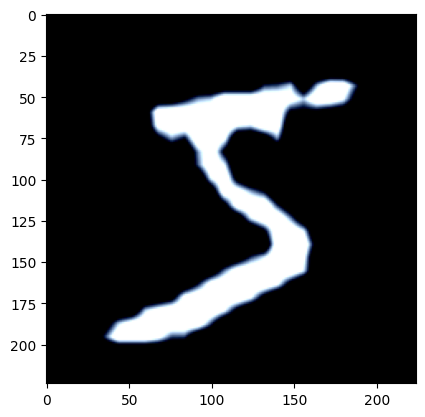

In [6]:
# display im
plt.imshow(im.squeeze().cpu().numpy().transpose(1,2,0))

In [7]:
from data import multimnist

In [8]:
sample_data = multimnist.generate()
image_final, text_final = sample_data

A 9, the 9 colored red
A 9, the 9 colored red, below a 3


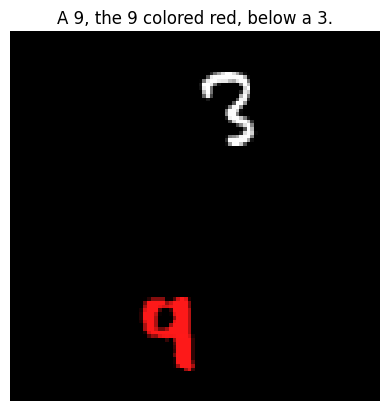

In [9]:
image_to_show = image_final.squeeze(0).permute(1, 2, 0).detach().numpy()

plt.imshow(image_to_show)
plt.title(text_final)
plt.axis('off')
plt.show()

In [13]:
# convert to a (1,28,28) tensor
# For Images
print(image_final.shape)
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    # convert greyscale to RGB
    transforms.Lambda(lambda img: img.convert('RGB')),
    # transforms.ToTensor(),
    transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], std=[0.26862954, 0.26130258, 0.27577711]),
])
# from PIL import Image
# image_final = Image.fromarray(image_final)
# import torchvision.transforms.functional as F
# image_final = F.to_pil_image(image_final)

im = preprocess(image_final).cuda().unsqueeze(0)
print(im.shape)


# text prompt
# text = "an image of a 5"

model = CLIPModel()
model.alignment(im, text_final)

torch.Size([1, 3, 100, 100])


TypeError: pic should be Tensor or ndarray. Got <class 'torch.Tensor'>.